In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('/content/Linear_X_Train.csv')
y = pd.read_csv('/content/Linear_Y_Train.csv')

In [3]:
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [4]:
y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [5]:
y.nunique()

y    3750
dtype: int64

In [6]:
X.shape, y.shape

((3750, 1), (3750, 1))

In [7]:
# dataframe to numpy array
X = X.values
y = y.values

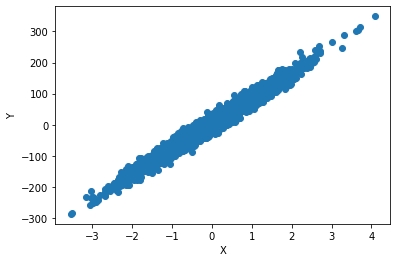

In [8]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel('Y')
plt.show()

In [9]:
def run(X, y, iter = 5, learning_rate = 0.001):
    m, c, hist_m, hist_c, cost = gd(X, y, iter, learning_rate)
    return m, c, hist_m, hist_c, cost

In [10]:
def gd(X, y, iter, learning_rate):
    m, c = 0, 0 # initiallizing
    hist_m = [] # to keep record m
    hist_c = [] # to keep record c
    cost = [] # cost record
    N = X.shape[0] # total no of rows

    for i in range(iter):
        m, c = step_gd(X, y, m, c, learning_rate) # for every iteration
        hist_m.append(m)
        hist_c.append(c)
        total_loss = (np.sum((m*X + c - y)**2))/N
        cost.append(total_loss)
    
    return m, c, hist_m, hist_c, cost

In [11]:
def step_gd(X, y, m, c, learning_rate):
    m_slope, c_slope = 0, 0 # intitalization
    N = X.shape[0] # no of rows

    for i in range(N):
        x = X[i]
        target = y[i]

        m_slope += (2/N)*(m*x+c-target)*x
        c_slope += (2/N)*(m*x+c-target)
    
    new_m = m - learning_rate*m_slope
    new_c = c - learning_rate*c_slope
    return new_m, new_c

In [12]:
m, c, hist_m, hist_c, cost = run(X, y, iter= 500, learning_rate= 0.01)

In [13]:
m, c

(array([80.53946791]), array([3.72641714]))

In [14]:
hist_m[:10]

[array([1.58494095]),
 array([3.13864825]),
 array([4.66173831]),
 array([6.15481536]),
 array([7.61847168]),
 array([9.05328785]),
 array([10.45983297]),
 array([11.8386649]),
 array([13.19033048]),
 array([14.51536572])]

In [15]:
hist_c[:10]

[array([0.01367738]),
 array([0.02827926]),
 array([0.04376353]),
 array([0.06008942]),
 array([0.07721739]),
 array([0.09510918]),
 array([0.11372769]),
 array([0.13303703]),
 array([0.15300244]),
 array([0.17359025])]

In [16]:
cost[:10]

[6327.602106145714,
 6088.558013758598,
 5858.838677952171,
 5638.079832912677,
 5425.931463254668,
 5222.057245716121,
 5026.1340127590165,
 4837.851237214661,
 4656.91053714684,
 4483.025200138515]

In [17]:
def plot(X, y, m, c):
    plt.scatter(X, y, c= 'b')
    pred = m*X + c
    plt.plot(X, pred, c= 'r')
    plt.xlabel("X")
    plt.ylabel('Y')
    plt.show()

In [ ]:
# for i in range(len(hist_m)):
#     print("m --> ", hist_m[i][0])
#     print("c ---> ", hist_c[i][0])

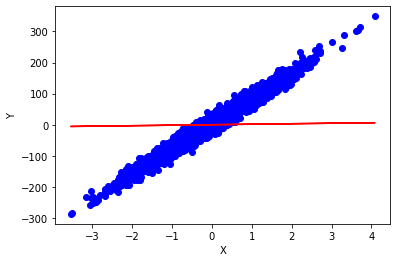

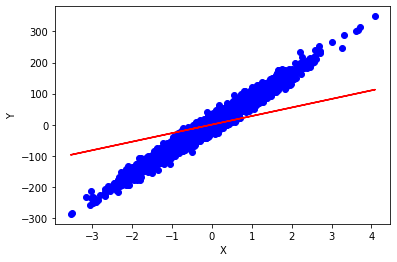

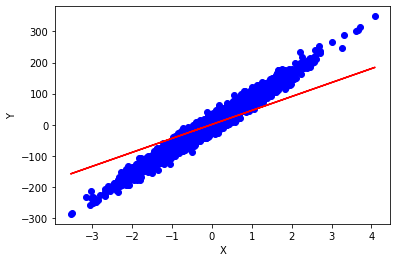

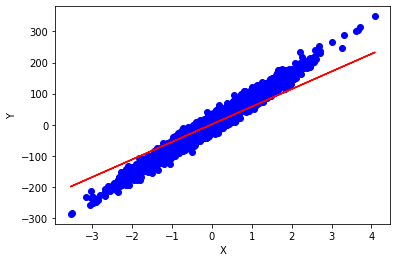

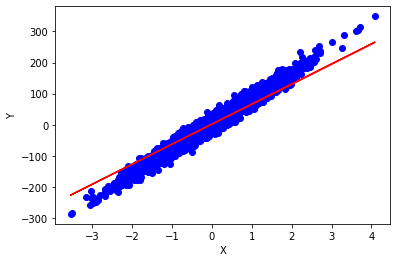

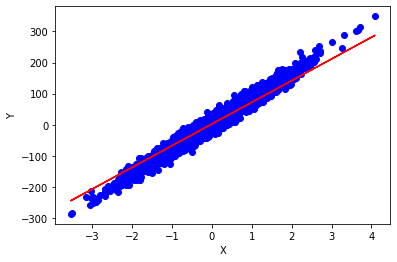

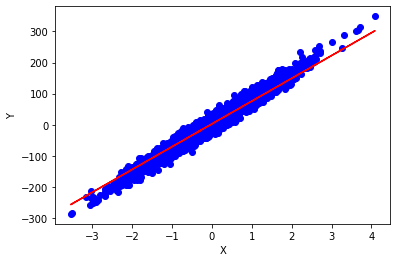

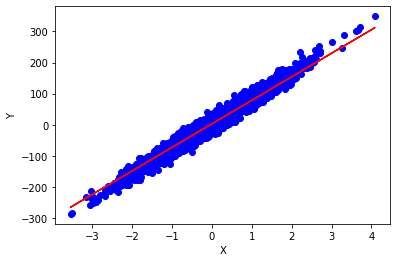

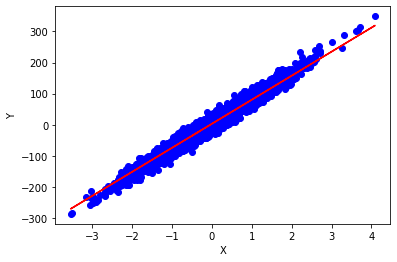

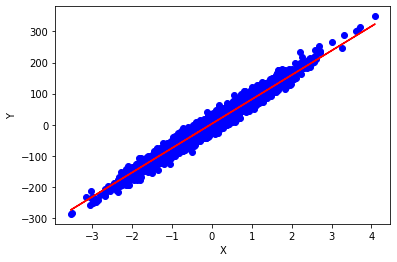

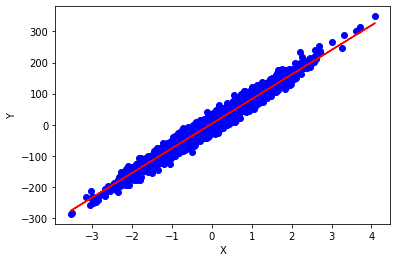

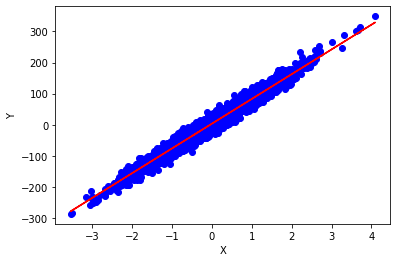

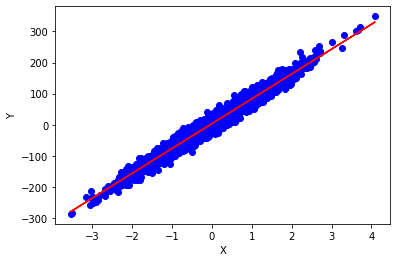

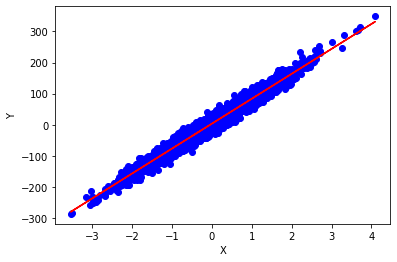

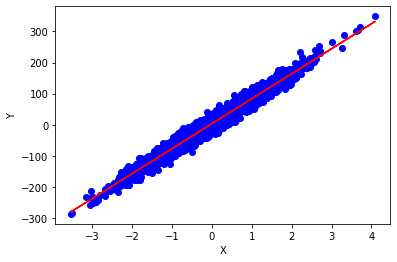

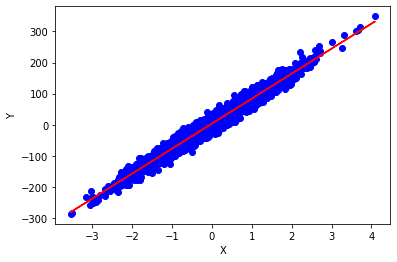

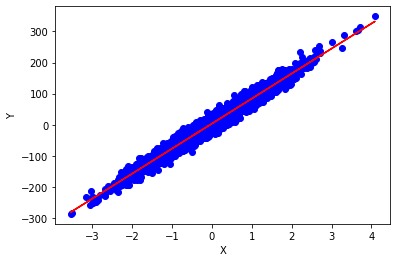

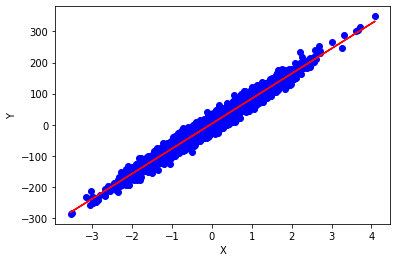

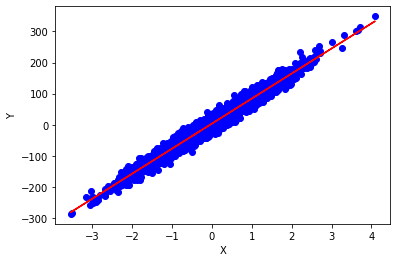

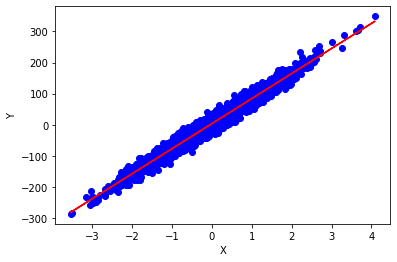

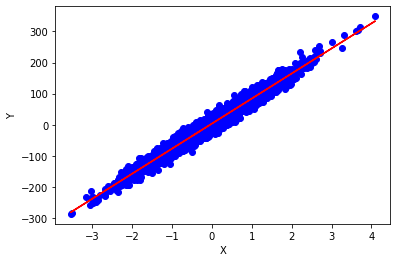

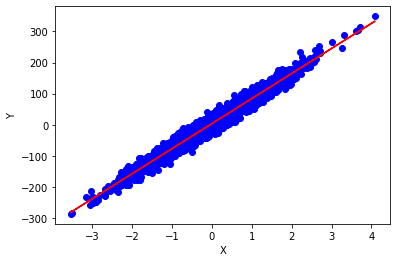

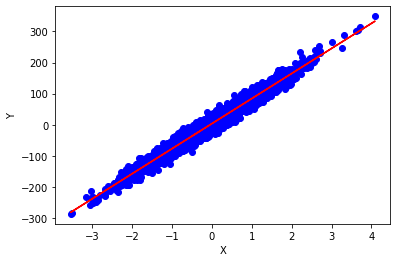

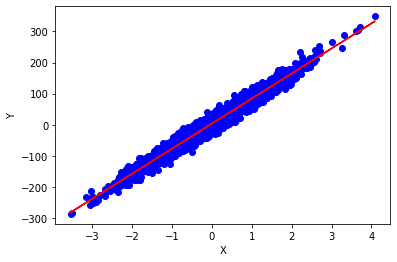

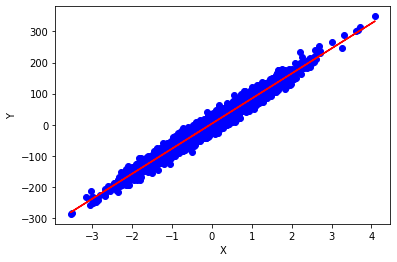

In [18]:
for i in range(len(hist_m)):
    # print("m --> ", hist_m[i][0])
    # print("c ---> ", hist_c[i][0])
    if i%20 == 0:
        plot(X, y, hist_m[i][0], hist_c[i][0])

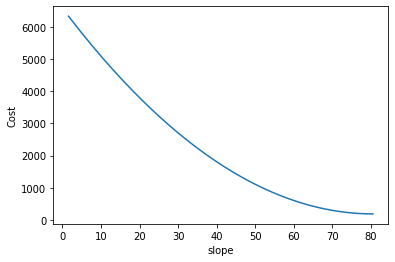

In [ ]:
# plot cost vs m
plt.plot(hist_m, cost)
plt.xlabel("slope")
plt.ylabel('Cost')
plt.show()

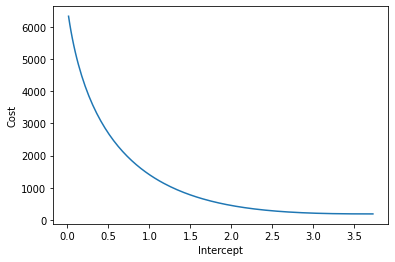

In [19]:
# plot cost vsc
plt.plot(hist_c, cost)
plt.xlabel("Intercept")
plt.ylabel('Cost')
plt.show()

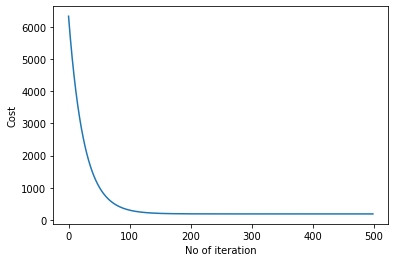

In [20]:
# plot cost
plt.plot(list(range(500)), cost)
plt.xlabel("No of iteration")
plt.ylabel("Cost")
plt.show()

# 3d Plot

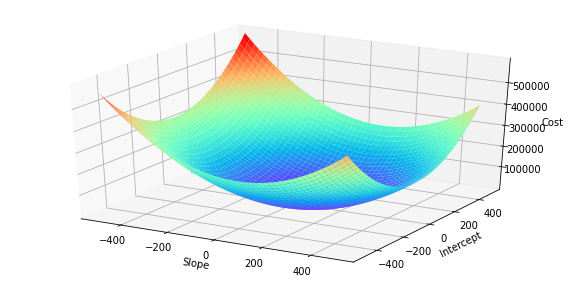

In [21]:
x1 = np.arange(-500, 500, 1)
y1 = np.arange(-500, 500, 1)
x1 , y1 = np.meshgrid(x1,y1)

z = np.zeros(x1.shape)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        prediction = x1[i, j]*X + y1[i, j]
        z[i, j] = np.sum((prediction - y)**2)/y.shape[0]

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection = '3d')
ax.plot_surface(x1, y1, z, cmap = 'rainbow')
ax.set_xlabel("Slope")
ax.set_ylabel("Intercept")
ax.set_zlabel("Cost")
plt.show()

In [22]:
x1 = np.arange(0, 81, 1)
y1 = np.arange(0, 3.8, 0.1)
x1 , y1 = np.meshgrid(x1,y1)
x1.shape, y.shape

((38, 81), (3750, 1))

In [23]:
z = np.zeros(x1.shape)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        prediction = x1[i, j]*X + y1[i, j]
        z[i, j] = np.sum((prediction - y)**2)/y.shape[0]

In [24]:
z.shape

(38, 81)

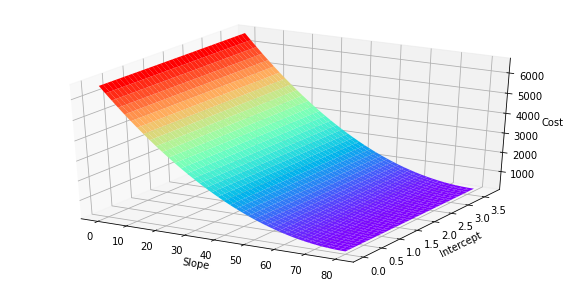

In [25]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection = '3d')
ax.plot_surface(x1, y1, z, cmap = 'rainbow')
ax.set_xlabel("Slope")
ax.set_ylabel("Intercept")
ax.set_zlabel("Cost")
plt.show()

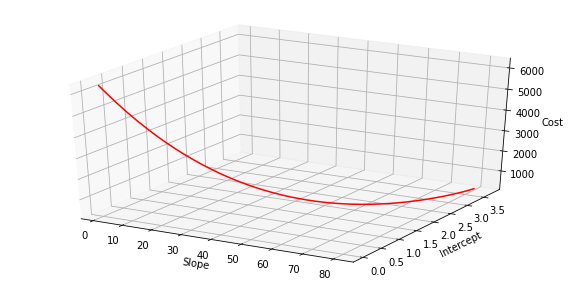

In [26]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection = '3d')
ax.plot3D(hist_m, hist_c, cost, c= 'red')
ax.set_xlabel("Slope")
ax.set_ylabel("Intercept")
ax.set_zlabel("Cost")
plt.show()